# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [56]:
# Carregando todas as bibliotecas

from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sns
import functools as ft


## Carregue os dados

In [57]:
# Carregue os arquivos de dados em diferentes DataFrames

# Leitura dados ambiente TripleTen:

# df_calls = pd.read_csv('/datasets/megaline_calls.csv')
# df_internet = pd.read_csv('/datasets/megaline_internet.csv')
# df_messages = pd.read_csv('/datasets/megaline_messages.csv')
# df_plans = pd.read_csv('/datasets/megaline_plans.csv')
# df_users = pd.read_csv('/datasets/megaline_users.csv')

# Leitura dados VsCode:

df_calls = pd.read_csv(r'datasets\megaline_calls.csv')
df_internet = pd.read_csv(r'datasets\megaline_internet.csv')
df_messages = pd.read_csv(r'datasets\megaline_messages.csv')
df_plans = pd.read_csv(r'datasets\megaline_plans.csv')
df_users = pd.read_csv(r'datasets\megaline_users.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [58]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos

df_plans.info()

In [59]:
# Imprima uma amostra de dados dos planos

df_plans.head()

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

R: Podemos identificar que o dataframe dos planos tem duas linhas, o que está correto visto que temos apenas 2 planos, e 8 colunas em que estão divididas as informações do plano como gigas incluídos, minutos incluídos e outras informações necessárias. Como podemos ver nas informações imprimidas, não há valores ausentes

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [60]:
print(df_plans.columns) # imprimir colunas
print(df_plans.duplicated().sum()) #imprimir soma dos valores duplicados

A linha acima criada apenas para confirmar que todas as colunas estão escritas corretamente, sem espaços no início e fim, bem como checar se não há duplicado (mesmo sendo visivelmente fácil de ver que não temos). Não tendo valores ausentes e todos os dados e tipos das colunas estarem corretos, não temos correções a fazer neste dataframe.

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Sendo um dataframe que terá a informação dos planos, não tem mais dados úteis que sejam preciso adicionar porque os outros conjuntos de dados são referentes aos dados de utilização dos serviços e dos usuários.

## Usuários

In [61]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

df_users.info()

In [62]:
# Imprima uma amostra de dados dos usuários

df_users.head(10)

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

R: O dataframe users tem um total de 8 colunas e 500 linhas, onde podemos desde o início identificamos que a coluna churn_date tem valores ausentes (NaN). Essa coluna é referente a data em que o usuário deixou de utilizar o serviço se estiver com valores e para os campos ausentes significa que está ativo. Para nossa análise não é um dado necessário, pois queremos entender qual plano gerou mais receita e por isso podemos remover essa coluna deste dataframe. A coluna user_id está como int64 e neste caso sendo um identificar o mais adequado, uma vez que não teremos operações numéricas com estes números, será substituir para dtype object. Podemos identificar também que a coluna plan está escrita como "plan" e está diferente do dataframe dos planos, pelo que precisa ser alterado para não gerar problemas mais ao final da análise.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [63]:
df_users = df_users.drop(labels=['churn_date'], axis='columns') # remover coluna com valores ausentes
df_users['user_id'] = df_users['user_id'].astype(object) # mudança do tipo da coluna "user_id"
df_users = df_users.rename(columns = {'plan': 'plan_name'}) # renomeando coluna

print(df_users.duplicated().sum()) # imprimi soma valores duplicados para checagem

In [64]:
df_users.info()
df_users.head(10)

## Chamadas

In [65]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

df_calls.info()

In [66]:
# Imprima uma amostra de dados das chamadas

df_calls.head()


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

R: Para este dataframe não temos valores ausentes e um conjunto de 4 colunas e 137735 linhas. Apenas será preciso mudar o tipo da coluna usar_id como feito nos datasframes anteriores pois é uma coluna que não será usada para operações matemáticas, bem como passar a coluna que temos datas para o datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [67]:
df_calls['user_id'] = df_calls['user_id'].astype(object) # mudança do tipo da coluna "useer_id"
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']) # mudança do tipo da coluna "call_date"

df_calls.info()

## Mensagens

In [68]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

df_messages.info()

In [69]:
# Imprima uma amostra dos dados das mensagens

df_messages.head(10)

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

R: Dataframe de 3 colunas e 76051 linhas, onde apenas será necessário ajustar o tipo da coluna user_id

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [70]:
df_messages['user_id'] = df_messages['user_id'].astype(object) # mudança do tipo da coluna "useer_id"
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']) # mudança do tipo da coluna "message_date"
df_messages.info()
print()
print(df_messages.duplicated().sum()) # imprimi soma valores duplicados para checagem

## Internet

In [71]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

df_internet.info()

In [72]:
#  Imprima uma amostra de dados para o tráfego da internet

df_internet.head(10)

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

R: Dataframe com 4 colunas e 104825 linhas, sem valores ausentes. Será preciso alterar o tipo da coluna user_id como feito anteriormente já nos outros datasframes e também está a ser utilizado a contagem em MB para os dados de internet utilizado quando no dataframe "plans" é utilizada a contagem em GB, sendo assim, será transformada a coluna de MB para GB para que fique padronizado, renomear a mesma para ter a identificação correta e assim ficar mais fácil de analisar os dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [73]:
df_internet['user_id'] = df_internet['user_id'].astype(object) # mudança do tipo da coluna "useer_id"
df_internet['mb_used'] = df_internet['mb_used'] / 1024 # linha para transformar MB em GB
df_internet = df_internet.rename(columns = {'mb_used': 'gb_used'}) # renomear coluna
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']) # mudança do tipo da coluna "message_date"
df_internet.info()
print()
print(df_internet.duplicated().sum()) # imprimi soma valores duplicados para checagem
print()
df_internet.head(10)

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [74]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

df_plans.info()
df_plans.head()

## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [75]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

df_calls['month'] = df_calls['call_date'].dt.to_period('M') # converter linha para período mensal de modo a facilitar a análise
monthly_calls = df_calls.groupby(['user_id', 'month']).size().reset_index(name = 'call_count')

monthly_calls.sample(20)

In [76]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

df_calls['month'] = df_calls['call_date'].dt.to_period('M') # converter linha para período mensal de modo a facilitar a análise
monthly_minutes_durations = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_duration')

monthly_minutes_durations.sample(20)

In [77]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

df_messages['month'] = df_messages['message_date'].dt.to_period('M') # converter linha para período mensal de modo a facilitar a análise
monthly_messages = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='total_messages')

monthly_messages.sample(20)

In [78]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

df_internet['month'] = df_internet['session_date'].dt.to_period('M') # converter linha para período mensal de modo a facilitar a análise
monthly_internet = df_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='total_gb')

monthly_internet.sample(20)

[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [79]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
# Adicione as informações sobre o plano

all_data = monthly_internet.merge(monthly_messages, on = ['user_id', 'month'], how = 'outer') # linha para iniciar a combinação de todos dos dataframes limpos, visto ser preciso fazer estes passo para cada dataframe
all_data = all_data.merge(monthly_calls, on = ['user_id', 'month'], how = 'outer') # segunda linha para a combinação de todos os dataframes limpos
all_data = all_data.merge(monthly_minutes_durations, on = ['user_id', 'month'], how = 'outer') # terceira linha para a combinação de todos os dataframes limpos
all_data = all_data.merge(df_users[['user_id', 'plan_name']], on = ['user_id'], how = 'outer') # quarta linha para a combinação de todos os dataframes limpos
all_data = all_data.merge(df_plans, on = ['plan_name'], how = 'outer') # última linha de combinação dos dataframes limpos

all_data['mb_per_month_included'] = all_data['mb_per_month_included'] / 1024 # linha para transformar MB em GB
all_data = all_data.rename(columns = {'mb_per_month_included': 'gb_per_month_included'}) # renomear coluna

all_data['total_duration'] = all_data['total_messages'].fillna(0) # substituir valores NaN
all_data['total_messages'] = all_data['total_messages'].fillna(0) # substituir valores NaN

all_data


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [80]:
# Calcule a receita mensal para cada usuário

all_data['revenue'] = all_data['usd_monthly_pay'] # cálculo receita mensal
all_data['used_minutes'] = all_data['total_duration'] - all_data['minutes_included'] # cálculo valor a ser cobrado chamadas
all_data['used_messages'] = all_data['total_messages'] - all_data['messages_included'] # cálculo valor a ser cobrado chamadas
all_data['used_internet'] = all_data['total_gb'] - all_data['gb_per_month_included'] # cálculo valor a ser cobrado chamadas

all_data.loc[all_data['used_minutes'] < 0, 'used_minutes'] = 0 # substituição de valores negativos para 0
all_data.loc[all_data['used_messages'] < 0, 'used_messages'] = 0 # substituição de valores negativos para 0
all_data.loc[all_data['used_internet'] < 0, 'used_internet'] = 0 # substituição de valores negativos para 0

all_data['revenue'] = all_data['revenue'] + all_data['used_minutes'] * all_data['usd_per_minute'] # cálculo receita mensal chamadas
all_data['revenue'] = all_data['revenue'] + all_data['used_messages'] * all_data['usd_per_message'] # cálculo receita mensal mensagens
all_data['revenue'] = all_data['revenue'] + all_data['used_internet'] * all_data['usd_per_gb'] # cálculo receita mensal internet

all_data['revenue'] = all_data['revenue'].fillna(0)

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

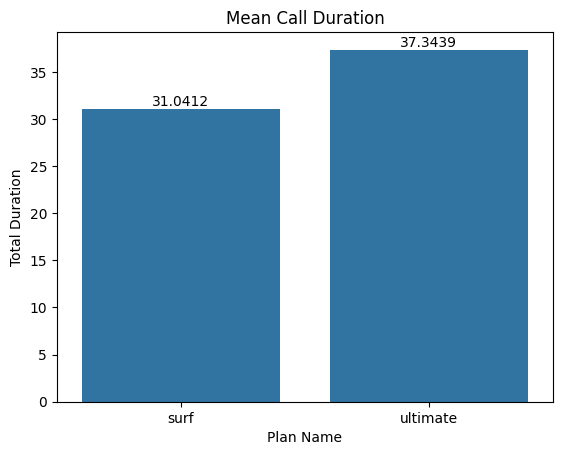

In [81]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

mean_duration_plan = all_data.groupby('plan_name')['total_duration'].mean().reset_index() # cálculo da média

# abaixo são as linhas de códigos para criação do gráfico em barras

call_bar_graphic = sns.barplot(
    data = mean_duration_plan,
    x = 'plan_name',
    y = 'total_duration'
)

for container in call_bar_graphic.containers: # linha 13 e 14 feita com ajuda do instrutor Pedro. Estas linhas servem para aparecer o resultado da média calculada no gráfico
    call_bar_graphic.bar_label(container) 

call_bar_graphic.set(
    title = 'Mean Call Duration',
    xlabel = 'Plan Name',
    ylabel = 'Total Duration'
);

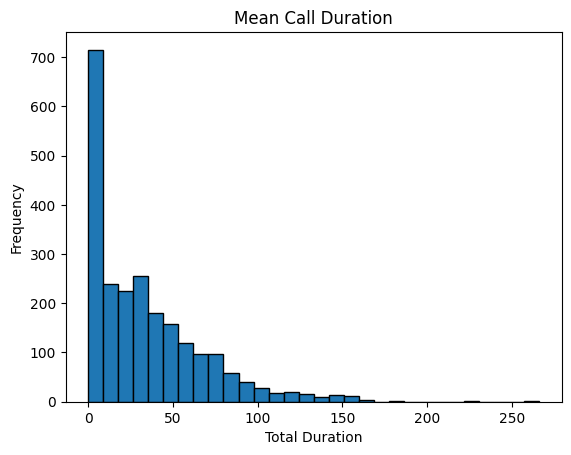

In [82]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

plt.hist(all_data['total_duration'], bins = 30, edgecolor='black')
plt.title('Mean Call Duration')
plt.xlabel('Total Duration')
plt.ylabel('Frequency');


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [83]:
# Calcule a média e a variância da duração mensal das chamadas

mean_duration_calls = all_data['total_duration'].mean() # cálculo média
median_duration_calls = all_data['total_duration'].median() # cálculo mediana

mean_duration_calls

In [84]:
median_duration_calls

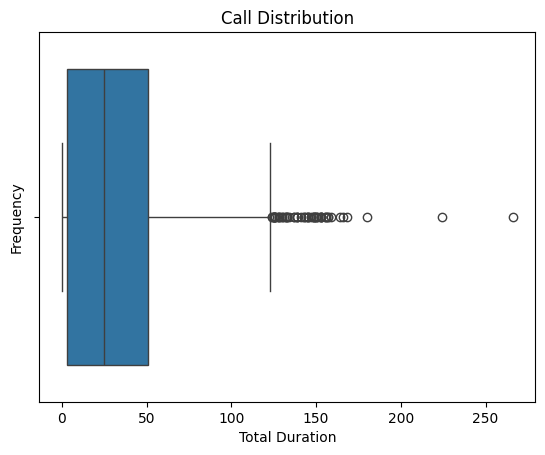

In [85]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

call_box_graphic = sns.boxplot(
    data = all_data,
    x = 'total_duration'
)

call_box_graphic.set(
    title = 'Call Distribution',
    xlabel = 'Total Duration',
    ylabel = 'Frequency'
);

Como podemos ver na análise, a duração média das chamadas são maiores no plano ultimate do que no plano surf com uma diferença de basicamente 6.30 minutos, contudo, também identificamos que a frequência de chamadas está mais concentrada entre 0 e 25/30 tendo assim muito mais chamadas curtas efetuadas no geral do que chamadas longas.

### Mensagens

In [86]:
all_data

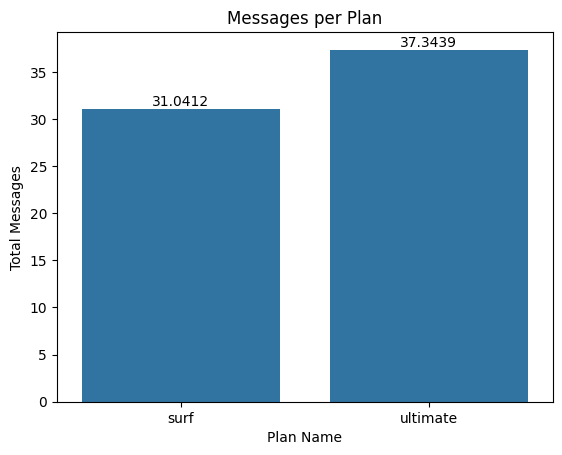

In [87]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

messages_plan = all_data.groupby('plan_name')['total_messages'].mean().reset_index()

message_bar_graphic = sns.barplot(
    data = messages_plan,
    x = 'plan_name',
    y = 'total_messages'
)

for container in message_bar_graphic.containers: # Estas linhas servem para aparecer o resultado da média calculada no gráfico
    message_bar_graphic.bar_label(container)

message_bar_graphic.set(
    title = 'Messages per Plan',
    xlabel = 'Plan Name',
    ylabel = 'Total Messages'
);


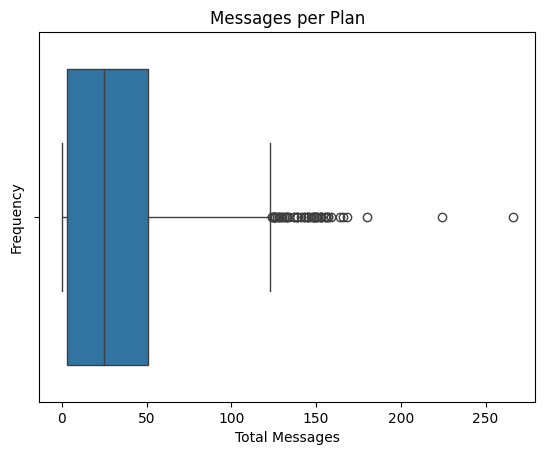

In [88]:
message_box_graphic = sns.boxplot(
    data = all_data,
    x = 'total_messages'
)

message_box_graphic.set(
     title = 'Messages per Plan',
    xlabel = 'Total Messages',
    ylabel = 'Frequency'
);

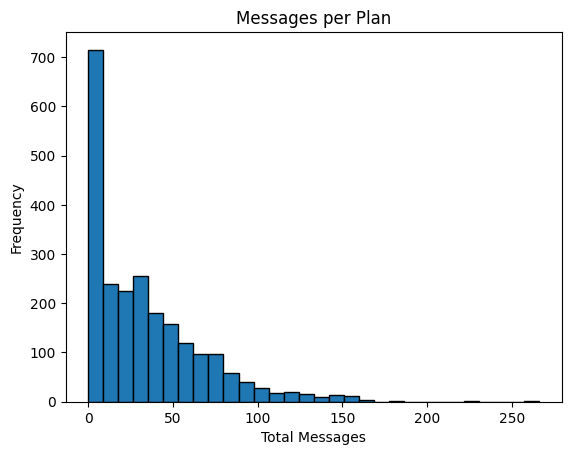

In [89]:
plt.hist(all_data['total_messages'], bins = 30, edgecolor='black')
plt.title('Messages per Plan')
plt.xlabel('Total Messages')
plt.ylabel('Frequency');

In [90]:
mean_total_messages = all_data['total_messages'].mean()
median_total_messages = all_data['total_messages'].median()

mean_total_messages

In [91]:
median_total_messages

Assim como nas chamadas verificamos que o plano ultimate tem uma utilização maior das mensagens quando tirada a média, tendo também os dados de modo geral concentrados na parte inicial do histograma e do boxplot indicando que apesar da diferença, a maioria dos usuários usam uma quantidade entre 0 e 25/30.

### Internet

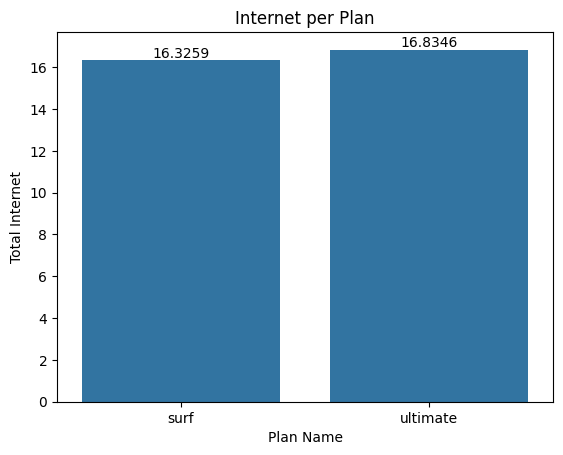

In [92]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

internet_plan = all_data.groupby('plan_name')['total_gb'].mean().reset_index()

internet_bar_graphic = sns.barplot(
    data = internet_plan,
    x = 'plan_name',
    y = 'total_gb'
)

for container in internet_bar_graphic.containers: # # Estas linhas servem para aparecer o resultado da média calculada no gráfico
    internet_bar_graphic.bar_label(container)

internet_bar_graphic.set(
    title = 'Internet per Plan',
    xlabel = 'Plan Name',
    ylabel = 'Total Internet'
);

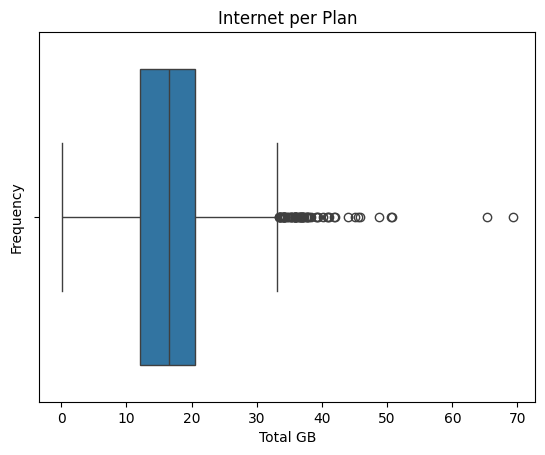

In [93]:
internet_box_graphic = sns.boxplot(
    data = all_data,
    x = 'total_gb'
)

internet_box_graphic.set(
     title = 'Internet per Plan',
    xlabel = 'Total GB',
    ylabel = 'Frequency'
);

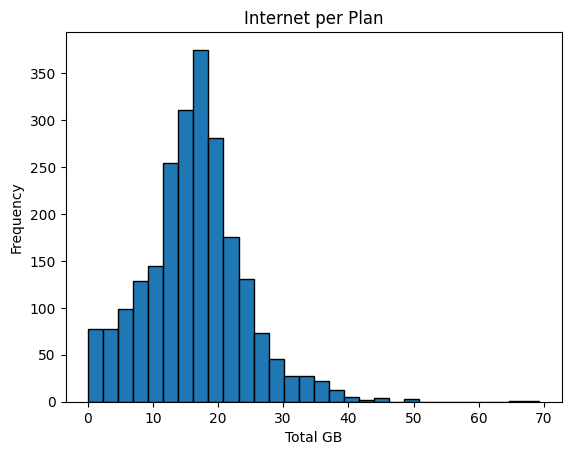

In [94]:
plt.hist(all_data['total_gb'], bins = 30, edgecolor='black')
plt.title('Internet per Plan')
plt.xlabel('Total GB')
plt.ylabel('Frequency');

In [95]:
mean_total_internet = all_data['total_messages'].mean() #cálculo média
median_total_internet = all_data['total_messages'].median() # cálculo mediana

mean_total_internet

In [96]:
median_total_internet

Neste caso podemos ver que a diferença entre a média de uso de internet é basicamente mesma tendo uma diferença de apenas 0.509 entre os planos com o ultimate mais uma vez tendo resultados maiores. Além disso, podemos identificar que temos uma parte de usuários que utilizam menos internet tendo a grande maioria concentrada nos valores de 12GB e 22GB

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

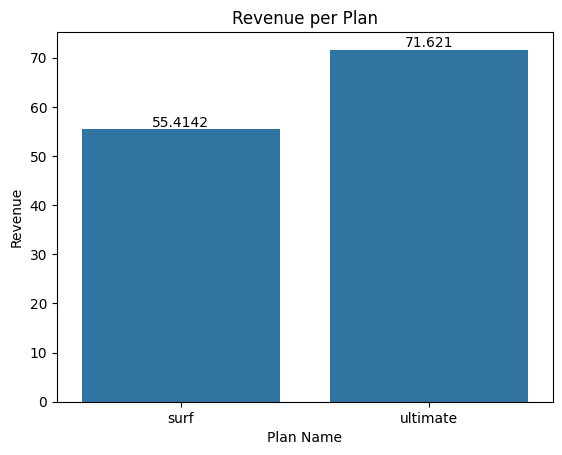

In [97]:
revenue_plan = all_data.groupby('plan_name')['revenue'].mean().reset_index()

revenue_bar_graphic = sns.barplot(
    data = revenue_plan,
    x = 'plan_name',
    y = 'revenue'
)

for container in revenue_bar_graphic.containers: # Estas linhas servem para aparecer o resultado da média calculada no gráfico
    revenue_bar_graphic.bar_label(container)

revenue_bar_graphic.set(
    title = 'Revenue per Plan',
    xlabel = 'Plan Name',
    ylabel = 'Revenue'
);

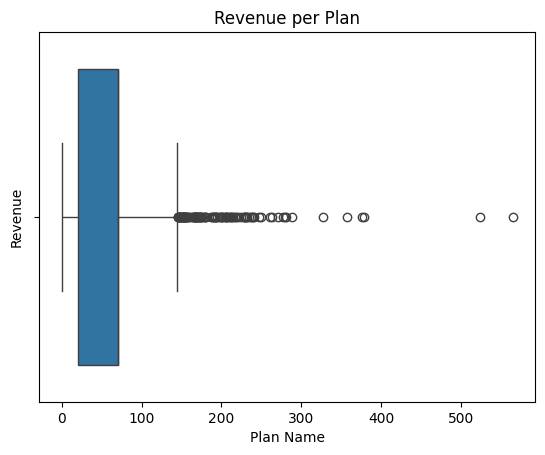

In [98]:
revenue_box_graphic = sns.boxplot(
    data = all_data,
    x = 'revenue'
)

revenue_box_graphic.set(
     title = 'Revenue per Plan',
    xlabel = 'Plan Name',
    ylabel = 'Revenue'
);

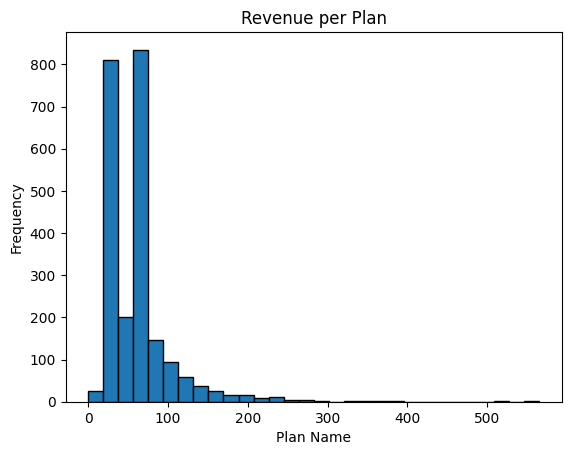

In [99]:
plt.hist(all_data['revenue'], bins = 30, edgecolor='black')
plt.title('Revenue per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Frequency');

In [100]:
mean_revenue = all_data['revenue'].mean() # cálculo média
median_revenue = all_data['revenue'].median() # cálculo mediana

mean_revenue

In [101]:
median_revenue

Temos uma grande diferença na receita em que a média geral onde o plano ultimate tem uma diferença positiva de 16.21 em relação ao plano surf. Contudo, ao avaliar mais afundo conseguimos perceber que no geral está concentrada a receita no valores corretos do plano (20 e 70) tendo uma minoria das pessoas com gastos que não são o valor base.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [102]:
# Teste as hipóteses

surf_plan = all_data[all_data['plan_name'] == 'surf']['revenue'] # seleção da receita referente o plano surf
ultimate_plan = all_data[all_data['plan_name'] == 'ultimate']['revenue'] # seleção da receita referente o plano ultimate

plan_result = ttest_ind(surf_plan, ultimate_plan) # teste hipóstese nula e alternativa

alpha = 0.05
plan_result.pvalue < alpha

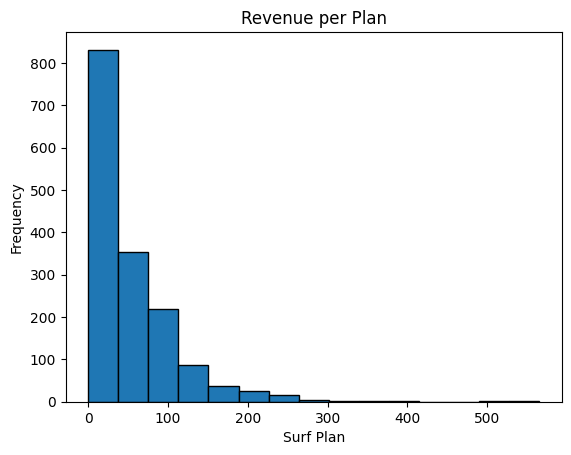

In [103]:
plt.hist(surf_plan, bins = 15, edgecolor='black')
plt.title('Revenue per Plan')
plt.xlabel('Surf Plan')
plt.ylabel('Frequency');

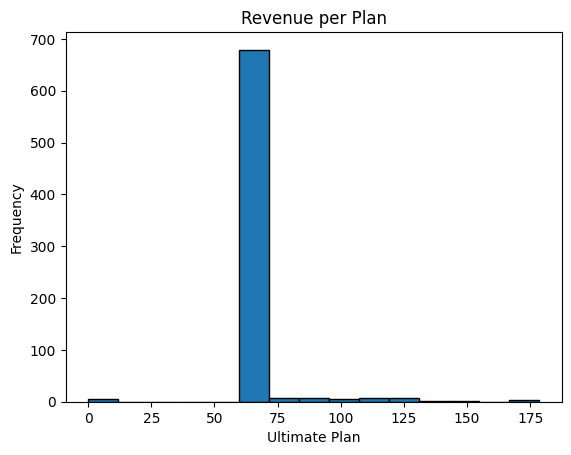

In [104]:
plt.hist(ultimate_plan, bins = 15, edgecolor='black')
plt.title('Revenue per Plan')
plt.xlabel('Ultimate Plan')
plt.ylabel('Frequency');

In [110]:
print(plan_result.pvalue)
if plan_result.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa na receita média entre os planos Surf e Ultimate.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa na receita média entre os planos Surf e Ultimate.")

Hipótese estatística receita dos planos serem diferentes - Como já visto anteriormente e comprovado no teste realizado, existe uma diferença na receita dos planos Surf e Ultimate sendo assim a hipótese alternativa válida e a hipótese nula descartada.

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [106]:
# Teste as hipóteses

all_data = all_data.merge(df_users[['user_id', 'city']], on = ['user_id'], how = 'outer') # adicionar coluna city ao dataframe

revenue_plan_NY_NJ = all_data[all_data['city'].str.contains('NY-NJ')]['revenue'] # seleção da receita referente o plano em NY-NJ
revenue_plan_others = all_data[~all_data['city'].str.contains('NY-NJ')]['revenue'] # seleção da receita referente o plano nas demais cidades

plan_result_two = ttest_ind(revenue_plan_NY_NJ, revenue_plan_others) # teste hipóstese nula e alternativa

alpha = 0.05
plan_result_two.pvalue < alpha

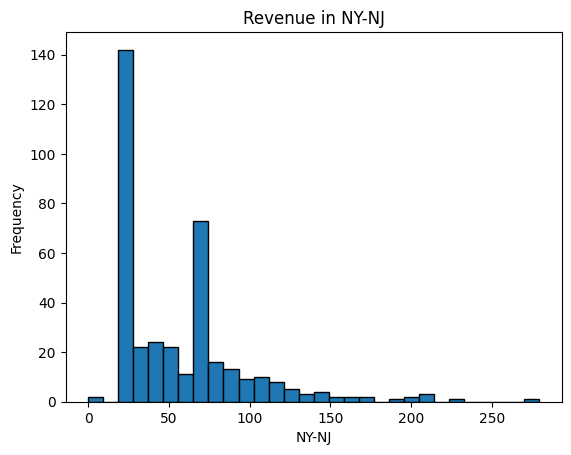

In [107]:
plt.hist(revenue_plan_NY_NJ, bins = 30, edgecolor='black')
plt.title('Revenue in NY-NJ')
plt.xlabel('NY-NJ')
plt.ylabel('Frequency');

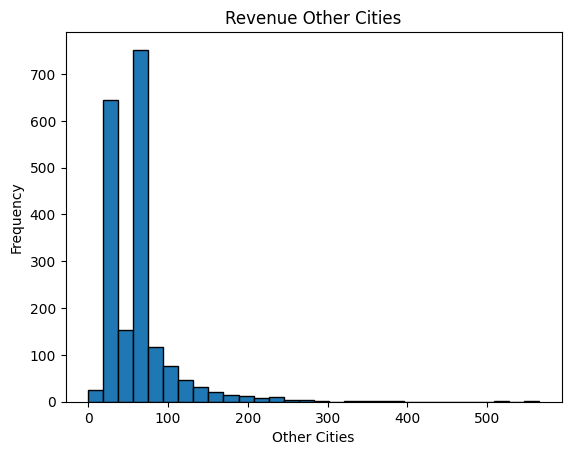

In [108]:
plt.hist(revenue_plan_others, bins = 30, edgecolor='black')
plt.title('Revenue Other Cities')
plt.xlabel('Other Cities')
plt.ylabel('Frequency');

In [109]:
print(plan_result_two.pvalue)
if plan_result_two.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa na receita média entre os usuários da área de NY-NJ e os usuários das demais regiões.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa na receita média entre os usuários da área de NY-NJ e os usuários das demais regiões.")

Hipótese estatística receita dos planos serem diferentes entre NY-NJ e as demais cidades - Nesta situação a receita dos planos também são diferentes a cidade de NY-NJ para as demais cidades. Podemos ver que NY-NJ tem uma grande concentração e receita nos 20 e 70, contudo contém dados dispersos em outros valores de usuários que ultrapassam o valor base do plano. Já nas demais cidades, temos a mesma situação e NY-NJ onde a maior concentração está em 20 e 70, contudo, a distribuição no restantes dos valores é menor do que na cidade de NY-NJ.

## Conclusão geral

Podemos concluir que existe uma diferença na receita dos planos e apesar do plano ultimate ser mais caro, tem uma quantidade significativa de usuários  com isso acaba por ser o que maior valor para a empresa. Referente aos dados, a maioria dos usuários utilizada o que tem disponível no plano escolhido, de modo que não seja ultrapassado as condições contratadas e pague mais que o valor base acordado. Pode-se adicionar a essa informação e que a receita de modo geral entre as cidades são iguais, tendo uma pequena diferença apenas no caso das pessoas que gastam mais do que o contratado.

## Comentário correção

Após entrega inicial do projeto, foram dadas algumas dicas de como poderia ser feito de um modo diferente algumas linhas que estavam certa, contudo, a parte da hipótese estava errada sendo indicado que era preciso analisar o p-valor e adicionar as frases se rejeitamos ou não a hipótese, para deixar a análise mais completa.

Fiquei com dúvida sobre o que fazer na parte de analisar melhor o p-valor, tendo apenas adicionado uma linha para imprimir o resultado e assim conseguir perceber a diferença existente para a conclusão que cheguei.